### Health Insurance Lead Prediction 

Complete Approach of My Code Can be found on Below Link

https://drive.google.com/file/d/1qNrcSd74Kk5T0ZAeEq15yMINu8FKnKra/view?usp=sharing

### Installing Packages

In [1]:
!pip install catboost
!pip install shap
!pip install colorama
!pip install category_encoders
!pip install bayesian-optimization
!pip install scikit-optimize

     |████████████████████████████████| 65.7MB 58kB/s 
     |████████████████████████████████| 358kB 9.1MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490495 sha256=de5836d2c07c577d77d5f0dd491dc45600f01789b0c583daf3cb509861f98151
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap
     |████████████████████████████████| 81kB 5.7MB/s 
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=05dbc139af1fa802c0101abe09b685e22a568813eac5d175ef0e986b56751bf7
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization
     |████████████████████████████████| 102kB 5.8MB/s 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline
import shap
shap.initjs()
import time
import colorama  # https://pypi.python.org/pypi/colorama

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,Pool

### Metrics
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold, KFold

# Setting SEED to Reproduce Same Results even with "GPU"
seed_value = 1994
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
SEED=seed_value

import gc

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [8]:
train_data = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
display(train_data.head(2))
display(test_data.head(2))
print(train_data.shape,test_data.shape)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8


(50882, 14) (21805, 13)


### Reformatting Certain Features 

In [9]:
train_data['Holding_Policy_Duration'] = np.where((train_data['Holding_Policy_Duration']=='14+'),'99.0',train_data['Holding_Policy_Duration'])
test_data['Holding_Policy_Duration'] = np.where((test_data['Holding_Policy_Duration']=='14+'),'99.0',test_data['Holding_Policy_Duration'])

### Missing Values 

In [10]:
print('--------------Train Data-----------------')
print(train_data.isnull().sum())
print('--------------Test Data-----------------')
print(test_data.isnull().sum())

--------------Train Data-----------------
ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64
--------------Test Data-----------------
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


### Missing Value Imputation

We can see that Holding_Policy_Duration and Holding_Policy_Type are MNAR,We will Impute it and create new Feature which will preserve these information

In [11]:
train_data['Holding_Policy_Duration_NAN'] = np.where(train_data['Holding_Policy_Duration'].isnull(),1,0)
test_data['Holding_Policy_Duration_NAN'] = np.where(test_data['Holding_Policy_Duration'].isnull(),1,0)

train_data['Holding_Policy_Type_NAN'] = np.where(train_data['Holding_Policy_Type'].isnull(),1,0)
test_data['Holding_Policy_Type_NAN'] = np.where(test_data['Holding_Policy_Type'].isnull(),1,0)

train_data['Health Indicator_NAN'] = np.where(train_data['Health Indicator'].isnull(),1,0)
test_data['Health Indicator_NAN'] = np.where(test_data['Health Indicator'].isnull(),1,0)

train_data['Holding_Policy_Duration_Policy_Type_NAN'] = np.where(train_data['Holding_Policy_Duration'].isnull() & train_data['Holding_Policy_Type'].isnull(),1,0)
train_data['Holding_Policy_Dur_Type_Health_Indicator_NAN'] = np.where(train_data['Holding_Policy_Type'].isnull() & train_data['Health Indicator'].isnull() & train_data['Holding_Policy_Duration'].isnull(),1,0)

test_data['Holding_Policy_Duration_Policy_Type_NAN'] = np.where(test_data['Holding_Policy_Duration'].isnull() & test_data['Holding_Policy_Type'].isnull(),1,0)
test_data['Holding_Policy_Dur_Type_Health_Indicator_NAN'] = np.where(test_data['Holding_Policy_Type'].isnull() & test_data['Health Indicator'].isnull() & test_data['Holding_Policy_Duration'].isnull(),1,0)


train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].fillna('-1.0')
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].fillna('-1.0')

train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].astype(float)
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].astype(float)

train_data['Holding_Policy_Type'] = train_data['Holding_Policy_Type'].fillna(-1.0)
test_data['Holding_Policy_Type'] = test_data['Holding_Policy_Type'].fillna(-1.0)

train_data['Health Indicator'] = train_data['Health Indicator'].fillna('UNK')
test_data['Health Indicator'] = test_data['Health Indicator'].fillna('UNK')

### Creating New Feature with Age Difference

In [12]:
train_data['Age_Difference_Upper_Lower'] = train_data['Upper_Age'] - train_data['Lower_Age']
test_data['Age_Difference_Upper_Lower'] = test_data['Upper_Age'] - test_data['Lower_Age']

print(train_data.shape,test_data.shape)

(50882, 20) (21805, 19)


### Dropping Features Which are not Important

In [13]:
train_data = train_data.drop(['ID'],axis=1)
test_data = test_data.drop(['ID'],axis=1)
print(train_data.shape,test_data.shape)

(50882, 19) (21805, 18)


### Exploratory Data Analysis

##### Numeric Features


In [77]:
dataset = train_data.copy()
numerical_features = [features for features in dataset.columns if dataset[features].dtypes != 'O' ]
print('Number of Numerical Features' , len(numerical_features))
print(numerical_features)

Number of Numerical Features 14
['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Holding_Policy_Duration_NAN', 'Holding_Policy_Type_NAN', 'Health Indicator_NAN', 'Holding_Policy_Duration_Policy_Type_NAN', 'Holding_Policy_Dur_Type_Health_Indicator_NAN', 'Age_Difference_Upper_Lower']


#### Discrete Features

In [78]:
numerical_features.remove('Response')
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25]
print('Discrete Value Count : {}'.format(len(discrete_feature)))
discrete_feature

Discrete Value Count : 8


['Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Holding_Policy_Duration_NAN',
 'Holding_Policy_Type_NAN',
 'Health Indicator_NAN',
 'Holding_Policy_Duration_Policy_Type_NAN',
 'Holding_Policy_Dur_Type_Health_Indicator_NAN']

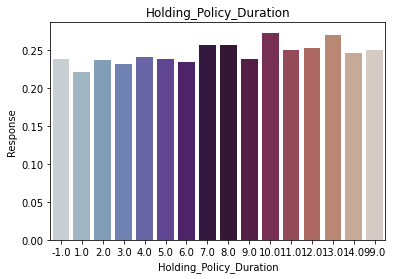

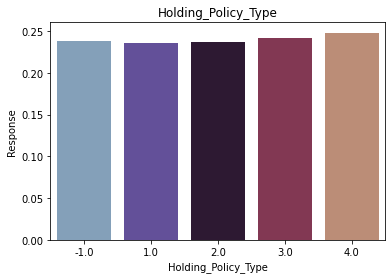

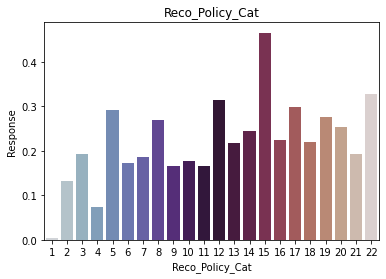

In [79]:
discrete_feature = discrete_feature[0:3]
for feature in discrete_feature:
    data = dataset.copy()
    data_feat = data.groupby(feature)['Response'].mean()
    sns.barplot(x=data_feat.index,  y= data_feat.values, palette='twilight')
    plt.xlabel(feature)
    plt.ylabel('Response')
    plt.title(feature)
    plt.show()

### Continuous Feature

In [80]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print('Number of Continous Feature : {}'.format(len(continuous_feature)))
continuous_feature

Number of Continous Feature : 10


['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Reco_Policy_Premium',
 'Holding_Policy_Duration_NAN',
 'Holding_Policy_Type_NAN',
 'Health Indicator_NAN',
 'Holding_Policy_Duration_Policy_Type_NAN',
 'Holding_Policy_Dur_Type_Health_Indicator_NAN',
 'Age_Difference_Upper_Lower']

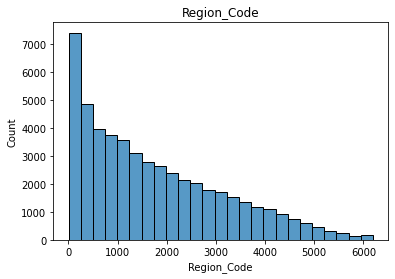

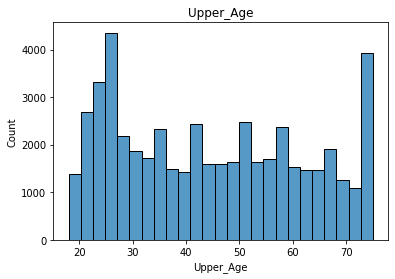

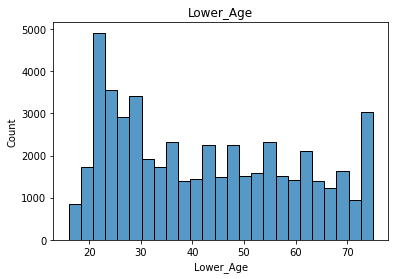

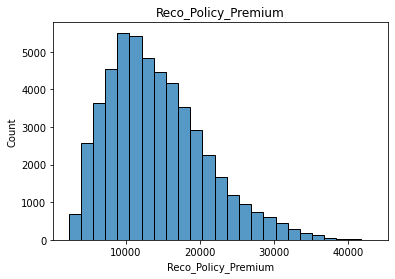

In [81]:
continuous_feature = continuous_feature[0:4]
for feature in continuous_feature:
    data =dataset.copy()
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=data,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [82]:
categorical_features = [feature for feature in dataset.columns if data[feature].dtypes=='O']
print(len(categorical_features))
categorical_features

5


['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator']

### Cardinality of Categorical Features

In [83]:
for feature in categorical_features:
    print('Feature : {} \t Number of Unique Categories : {} '.format(feature,len(dataset[feature].unique())))

Feature : City_Code 	 Number of Unique Categories : 36 
Feature : Accomodation_Type 	 Number of Unique Categories : 2 
Feature : Reco_Insurance_Type 	 Number of Unique Categories : 2 
Feature : Is_Spouse 	 Number of Unique Categories : 2 
Feature : Health Indicator 	 Number of Unique Categories : 10 


### Relationship between categorical feature and Selling price

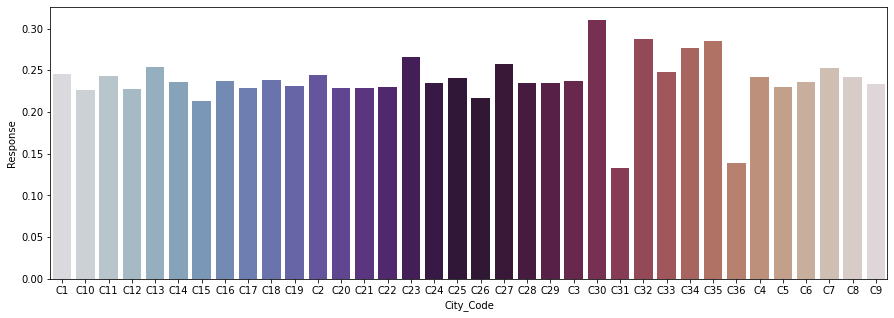

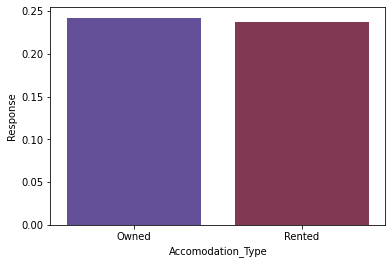

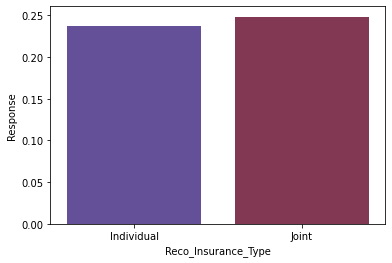

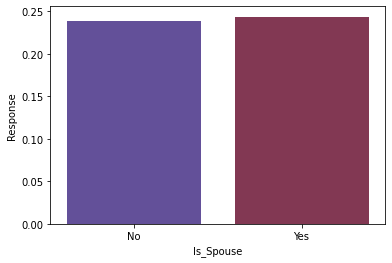

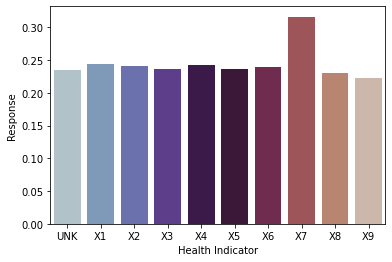

In [85]:
plt.figure(figsize=[15,5])
for feature in categorical_features:
    data = dataset.copy()
    data_feat = data.groupby(feature)['Response'].mean()
    sns.barplot(x=data_feat.index,  y= data_feat.values, palette='twilight')
    plt.xlabel(feature)
    plt.ylabel('Response')
    plt.show()

#### Outliers 

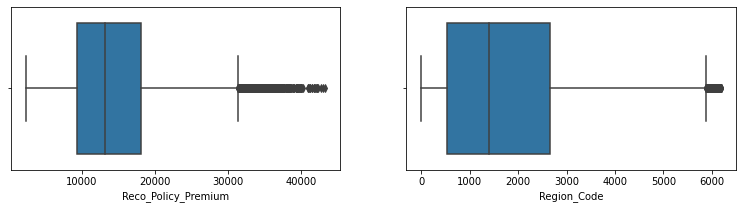

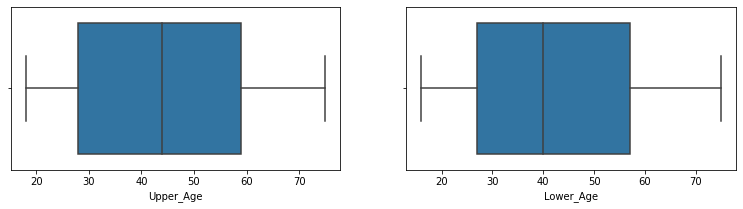

In [92]:
num_cols = ['Reco_Policy_Premium','Region_Code','Upper_Age','Lower_Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    plt.show()

### 2. Feature Engineering

#### Missing Values are All ready imputed in our First Step

#### Features Extraction

### create New Features from Premium and Region Code

In [ ]:
all_data = pd.concat([train_data, test_data],axis=0)
all_data.index = range(0,len(all_data))
all_data.iloc[50880:50890,:]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1.0,0,0,0,0,0,22
50881,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0.0,0,0,0,0,0,0
50882,C1,156,Owned,Individual,30,30,No,UNK,6.0,3.0,5,11934.0,NaN,0,0,1,0,0,0
50883,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,NaN,0,0,0,0,0,1
50884,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,NaN,0,0,0,0,0,0
50885,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,NaN,0,0,0,0,0,0
50886,C1,951,Owned,Individual,75,75,No,X3,-1.0,-1.0,5,22534.0,NaN,1,1,0,1,0,0
50887,C1,1329,Rented,Individual,24,24,No,X2,-1.0,-1.0,18,6150.0,NaN,1,1,0,1,0,0
50888,C2,3479,Owned,Individual,56,56,No,X5,99.0,4.0,17,19152.0,NaN,0,0,0,0,0,0
50889,C13,396,Rented,Individual,41,41,No,UNK,-1.0,-1.0,16,11034.0,NaN,1,1,1,1,1,0


### MAKE Whole Number 

In [ ]:
def make_whole_number(data):
  _data = str(int(data))
  _len_data = len(_data)
  _data = "".join(_data[0] + '0' * (_len_data-1))
  return int(_data)

In [ ]:
for fe in ['Region_Code','Reco_Policy_Premium']:
  all_data[fe+"___WHOLE_NUMBER"] = all_data[fe].apply(make_whole_number)

all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000


### Binning Numerical Features

In [ ]:
def create_bin_features(input_df, features):
    for bin_fe in features:
        print("Binning: ",bin_fe)
        input_df[bin_fe+"___BINS"] = pd.qcut(input_df[bin_fe], 10, labels=False, duplicates='drop')
    
    return input_df

In [ ]:
binning_num_features = ['Region_Code','Reco_Policy_Premium']
all_data = create_bin_features(all_data, binning_num_features)
all_data.head()

Binning:  Region_Code
Binning:  Reco_Policy_Premium


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data['Region_Code_Reco_Policy_Cat_Premium'] = all_data.groupby(['Region_Code','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')
all_data['Region_Code_City_Code_Premium'] = all_data.groupby(['Region_Code','City_Code'])['Reco_Policy_Premium'].transform('sum')

In [ ]:
all_data['Region_Code_Reco_Policy_Cat_Premium'] = np.log(all_data['Region_Code_Reco_Policy_Cat_Premium'])
all_data['Region_Code_City_Code_Premium'] = np.log(all_data['Region_Code_City_Code_Premium'])
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,Region_Code_Reco_Policy_Cat_Premium,Region_Code_City_Code_Premium
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4,9.361171,11.706029
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9,12.548047,12.729627
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1,9.713295,11.415180
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7,9.785830,11.179493
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3,12.097402,12.360073


In [ ]:
import category_encoders as ce
encoder= ce.BaseNEncoder(cols=['Region_Code'],return_df=True,base=4)
all_data=encoder.fit_transform(all_data)
all_data.head()

,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,Region_Code_Reco_Policy_Cat_Premium,Region_Code_City_Code_Premium
0,C3,0,0,0,0,0,0,0,1,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4,9.361171,11.706029
1,C5,0,0,0,0,0,0,0,2,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9,12.548047,12.729627
2,C5,0,0,0,0,0,0,0,3,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1,9.713295,11.415180
3,C24,0,0,0,0,0,0,1,0,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7,9.785830,11.179493
4,C8,0,0,0,0,0,0,1,1,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3,12.097402,12.360073


In [ ]:
#all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))

,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,Region_Code_Reco_Policy_Cat_Premium,Region_Code_City_Code_Premium
0,C3,0,0,0,0,0,0,0,1,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4,9.361171,11.706029
1,C5,0,0,0,0,0,0,0,2,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9,12.548047,12.729627


,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,Region_Code_Reco_Policy_Cat_Premium,Region_Code_City_Code_Premium
0,C1,0,0,0,0,1,2,0,2,Owned,Individual,30,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4,13.037134,13.574789
1,C4,0,0,0,2,1,3,3,2,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9,13.454577,14.045307


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.80058512, 0.79877656, 0.80244118, 0.80548384, 0.80632081,
       0.79306297, 0.78231975, 0.78575148, 0.78398315, 0.80303591])

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X_st, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.80058512, 0.79917385, 0.80244118, 0.80548384, 0.8063206 ,
       0.79306319, 0.78247065, 0.78575148, 0.78398315, 0.80303591])

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
model_cat_final_submit = CatBoostClassifier(verbose=0, n_estimators=1000)
model_cat_final_submit = model_cat_final_submit.fit(X_st,y)

y_pred = model_cat_final_submit.predict_proba(test_final_st)[:,1]
y_pred

array([0.07346638, 0.0599904 , 0.3158811 , ..., 0.00311849, 0.5757889 ,
       0.1562326 ])

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(y_pred)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0.073466
1,50884,0.059990
2,50885,0.315881
3,50886,0.072380
4,50887,0.037326
5,50888,0.105830
6,50889,0.220405
7,50890,0.627352
8,50891,0.112651
9,50892,0.118210


In [ ]:
sub['Response'].value_counts()

0.450200    2
0.163261    2
0.347630    1
0.471980    1
0.543263    1
           ..
0.295071    1
0.097559    1
0.183351    1
0.039977    1
0.090025    1
Name: Response, Length: 21803, dtype: int64

### By Using Below CSV -- Got ROC_AUC on Public LB = 0.8054

In [ ]:
sub.to_csv('Day3_submit_Cat_Updated_Features1.csv',index=False)

### Ensemble

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier(n_estimators=500)
ada_classifier.fit(X_st,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)

In [ ]:
lgb=LGBMClassifier(n_estimators=500)
lgb.fit(X_st,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
cat=CatBoostClassifier(n_estimators=500)
cat.fit(X_st,y)

Learning rate set to 0.104155
0:	learn: 0.6401172	total: 25.1ms	remaining: 12.5s
1:	learn: 0.6001672	total: 48.8ms	remaining: 12.2s
2:	learn: 0.5699071	total: 74.1ms	remaining: 12.3s
3:	learn: 0.5466575	total: 95.7ms	remaining: 11.9s
4:	learn: 0.5277174	total: 120ms	remaining: 11.9s
5:	learn: 0.5124064	total: 144ms	remaining: 11.9s
6:	learn: 0.4998031	total: 169ms	remaining: 11.9s
7:	learn: 0.4910053	total: 192ms	remaining: 11.8s
8:	learn: 0.4842368	total: 219ms	remaining: 12s
9:	learn: 0.4783782	total: 244ms	remaining: 11.9s
10:	learn: 0.4739711	total: 269ms	remaining: 11.9s
11:	learn: 0.4704631	total: 290ms	remaining: 11.8s
12:	learn: 0.4671150	total: 316ms	remaining: 11.8s
13:	learn: 0.4648515	total: 339ms	remaining: 11.8s
14:	learn: 0.4634977	total: 363ms	remaining: 11.7s
15:	learn: 0.4614329	total: 387ms	remaining: 11.7s
16:	learn: 0.4598389	total: 412ms	remaining: 11.7s
17:	learn: 0.4578082	total: 438ms	remaining: 11.7s
18:	learn: 0.4568644	total: 465ms	remaining: 11.8s
19:	learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_st,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = []
for model in [ada_classifier,lgb,cat]:
    pred.append(pd.Series(model.predict_proba(test_final_st)[:,1]))
    
### For Each Record - 4 models will give output - We will take mean of that value
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0        0.207855
1        0.208882
2        0.373852
3        0.211995
4        0.184984
           ...   
21800    0.212789
21801    0.202997
21802    0.166725
21803    0.583279
21804    0.282929
Length: 21805, dtype: float64

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(final_prediction)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0.207855
1,50884,0.208882
2,50885,0.373852
3,50886,0.211995
4,50887,0.184984
5,50888,0.240761
6,50889,0.326168
7,50890,0.505448
8,50891,0.232750
9,50892,0.237687


In [ ]:
sub['Response'].value_counts()

0.261418    2
0.451329    2
0.363993    1
0.216128    1
0.198830    1
           ..
0.251003    1
0.411835    1
0.192684    1
0.244867    1
0.555374    1
Name: Response, Length: 21803, dtype: int64

### By Using Below CSV -- Got ROC_AUC on Public LB = 0.8054

In [ ]:
sub.to_csv('Day3_submit_Cat_Updated_Features2.csv',index=False)

### Adding Few More Features

In [ ]:
all_data_og = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/All_data_Combined_New_Features_Without_Outliers.csv')
all_data = all_data_og.copy()
##Prev
all_data['Region_Code_Reco_Policy_Cat_Premium'] = all_data.groupby(['Region_Code','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')
all_data['Region_Code_City_Code_Premium'] = all_data.groupby(['Region_Code','City_Code'])['Reco_Policy_Premium'].transform('sum')
all_data['Region_Code_Reco_Policy_Cat_Premium'] = np.log(all_data['Region_Code_Reco_Policy_Cat_Premium'])
all_data['Region_Code_City_Code_Premium'] = np.log(all_data['Region_Code_City_Code_Premium'])

all_data['Hold_Reco_Premium_Policy'] = all_data.groupby(['Holding_Policy_Type','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')
all_data['Hold_Dur_Type_Premium'] = all_data.groupby(['Holding_Policy_Duration','Holding_Policy_Type'])['Reco_Policy_Premium'].transform('sum')

all_data['Hold_Reco_Premium_Policy'] = np.log(all_data['Hold_Reco_Premium_Policy'])
all_data['Hold_Dur_Type_Premium'] = np.log(all_data['Hold_Dur_Type_Premium'])

## 0.80
all_data['Health_Ind_Duration'] = all_data.groupby(['Health Indicator'])['Holding_Policy_Duration'].transform('nunique')
all_data['City_Region_Policy_type'] = all_data.groupby(['City_Code','Region_Code'])['Holding_Policy_Type'].transform('nunique')
all_data['City_Region_Reco_policy_cat'] = all_data.groupby(['City_Code','Region_Code'])['Reco_Policy_Cat'].transform('nunique')

import category_encoders as ce
encoder= ce.BaseNEncoder(cols=['Region_Code'],return_df=True,base=4)
all_data=encoder.fit_transform(all_data)

#all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))

for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.80465561, 0.80517214, 0.80438025, 0.81298712, 0.81258275,
       0.79969277, 0.78904705, 0.79219652, 0.78745814, 0.80749042])

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
model_cat_final_submit = CatBoostClassifier(verbose=0, n_estimators=1000)
model_cat_final_submit = model_cat_final_submit.fit(X_st,y)

y_pred = model_cat_final_submit.predict_proba(test_final_st)[:,1]
y_pred

array([0.09624654, 0.16351309, 0.35190734, ..., 0.00253669, 0.54583545,
       0.09760277])

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(y_pred)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0.096247
1,50884,0.163513
2,50885,0.351907
3,50886,0.076548
4,50887,0.030729
5,50888,0.099454
6,50889,0.247194
7,50890,0.577978
8,50891,0.097294
9,50892,0.104978


### By Using Below CSV -- Got ROC_AUC on Public LB = 0.809

In [ ]:
sub.to_csv('Day3_submit_Cat_Updated_Features_v3.csv',index=False)

Ensemble Model

In [ ]:
all_data_og = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/All_data_Combined_New_Features_Without_Outliers.csv')
all_data = all_data_og.copy()
##Prev
all_data['Region_Code_Reco_Policy_Cat_Premium'] = all_data.groupby(['Region_Code','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')
all_data['Region_Code_City_Code_Premium'] = all_data.groupby(['Region_Code','City_Code'])['Reco_Policy_Premium'].transform('sum')
all_data['Region_Code_Reco_Policy_Cat_Premium'] = np.log(all_data['Region_Code_Reco_Policy_Cat_Premium'])
all_data['Region_Code_City_Code_Premium'] = np.log(all_data['Region_Code_City_Code_Premium'])

all_data['Hold_Reco_Premium_Policy'] = all_data.groupby(['Holding_Policy_Type','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')
all_data['Hold_Dur_Type_Premium'] = all_data.groupby(['Holding_Policy_Duration','Holding_Policy_Type'])['Reco_Policy_Premium'].transform('sum')

all_data['Hold_Reco_Premium_Policy'] = np.log(all_data['Hold_Reco_Premium_Policy'])
all_data['Hold_Dur_Type_Premium'] = np.log(all_data['Hold_Dur_Type_Premium'])

## 0.80
all_data['Health_Ind_Duration'] = all_data.groupby(['Health Indicator'])['Holding_Policy_Duration'].transform('nunique')
all_data['City_Region_Policy_type'] = all_data.groupby(['City_Code','Region_Code'])['Holding_Policy_Type'].transform('nunique')
all_data['City_Region_Reco_policy_cat'] = all_data.groupby(['City_Code','Region_Code'])['Reco_Policy_Cat'].transform('nunique')

import category_encoders as ce
encoder= ce.BaseNEncoder(cols=['Region_Code'],return_df=True,base=4)
all_data=encoder.fit_transform(all_data)

#all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))

for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
X.head()

,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,Region_Code_Reco_Policy_Cat_Premium,Region_Code_City_Code_Premium,Hold_Reco_Premium_Policy,Hold_Dur_Type_Premium,Health_Ind_Duration,City_Region_Policy_type,City_Region_Reco_policy_cat
0,0.311427,0,0,0,0,0,0,0,1,0.311467,0.312015,36,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4,9.361171,11.706029,17.419256,17.903918,16,4,5
1,0.299048,0,0,0,0,0,0,0,2,0.319190,0.330333,75,22,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9,12.548047,12.729627,17.669890,19.692031,16,5,4
2,0.299048,0,0,0,0,0,0,0,3,0.319190,0.312015,32,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1,9.713295,11.415180,17.195254,17.269538,16,3,2
3,0.307329,0,0,0,0,0,0,1,0,0.319190,0.330333,52,48,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7,9.785830,11.179493,16.303674,17.903918,16,3,4
4,0.319211,0,0,0,0,0,0,1,1,0.311467,0.312015,44,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3,12.097402,12.360073,17.171649,16.848495,16,4,3


In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier(n_estimators=1000)
ada_classifier.fit(X_st,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=None)

In [ ]:
lgb=LGBMClassifier(n_estimators=1000)
lgb.fit(X_st,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
cat=CatBoostClassifier(n_estimators=1000)
cat.fit(X_st,y)

Learning rate set to 0.055162
0:	learn: 0.6655621	total: 23ms	remaining: 23s
1:	learn: 0.6389781	total: 44.8ms	remaining: 22.4s
2:	learn: 0.6174598	total: 62.9ms	remaining: 20.9s
3:	learn: 0.5998471	total: 93.9ms	remaining: 23.4s
4:	learn: 0.5827697	total: 120ms	remaining: 23.8s
5:	learn: 0.5670660	total: 146ms	remaining: 24.2s
6:	learn: 0.5542578	total: 173ms	remaining: 24.5s
7:	learn: 0.5416771	total: 202ms	remaining: 25s
8:	learn: 0.5318906	total: 228ms	remaining: 25.1s
9:	learn: 0.5240169	total: 252ms	remaining: 25s
10:	learn: 0.5162802	total: 277ms	remaining: 24.9s
11:	learn: 0.5099804	total: 299ms	remaining: 24.6s
12:	learn: 0.5033153	total: 326ms	remaining: 24.7s
13:	learn: 0.4982945	total: 352ms	remaining: 24.8s
14:	learn: 0.4934373	total: 377ms	remaining: 24.8s
15:	learn: 0.4895718	total: 408ms	remaining: 25.1s
16:	learn: 0.4859190	total: 435ms	remaining: 25.1s
17:	learn: 0.4824848	total: 457ms	remaining: 24.9s
18:	learn: 0.4796751	total: 482ms	remaining: 24.9s
19:	learn: 0.47

In [ ]:
pred = []
for model in [ada_classifier,lgb,cat]:
    pred.append(pd.Series(model.predict_proba(test_final_st)[:,1]))
    
### For Each Record - 4 models will give output - We will take mean of that value
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0        0.230485
1        0.254518
2        0.408368
3        0.255040
4        0.178769
           ...   
21800    0.193700
21801    0.209094
21802    0.167058
21803    0.569449
21804    0.220002
Length: 21805, dtype: float64

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(final_prediction)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0.230485
1,50884,0.254518
2,50885,0.408368
3,50886,0.255040
4,50887,0.178769
5,50888,0.234965
6,50889,0.332963
7,50890,0.536410
8,50891,0.226139
9,50892,0.221740


In [ ]:
sub.to_csv('Day3_submit_Cat_Updated_Features_v6.csv',index=False)